# 주택단위 분석을 위한 자료 및 코드 set-up
- 주택 특성마다 가격이 다르게 형성 >> 이런 연구를 어떻게 하는지에 대한 조사(오피스텔과 아파트의 특성 타입 비교)

In [298]:
import pandas as pd
import numpy as np
import json


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)


matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


# pandas max row 
pd.options.display.max_rows = 1000


## 아파트

- 전세
- 월세
- 매매

위 세개를 같이 놓고 비교 해야한다. → 트렌드 양상 비교 

`공식` = 전세금 * 시중금리(그해의) = 월세 (반대도 가능)




In [299]:
apt_trd = pd.read_csv('data/3.세종시_아파트(매매)_실거래가.csv')
apt_mth_yr = pd.read_csv('data/7.세종시_아파트(전월세)_실거래가.csv')

In [300]:
apt_trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      18409 non-null  int64  
 1   계약일       18409 non-null  int64  
 2   시군구       18409 non-null  object 
 3   본번        18409 non-null  object 
 4   부번        18409 non-null  int64  
 5   단지명       18409 non-null  object 
 6   전용면적(㎡)   18409 non-null  float64
 7   거래금액(만원)  18409 non-null  object 
 8   층         18409 non-null  int64  
 9   건축년도      18409 non-null  int64  
 10  해제사유발생일   490 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.5+ MB


In [301]:
apt_trd.head(3)

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,"23,000",11,2015,NaN
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,"32,500",21,2015,NaN


In [302]:
apt_mth_yr.head(3)

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,"10,000",0,13,2015
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,"18,000",0,19,2015
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,"17,000",0,10,2015


In [303]:
# 전세와 월세 분할
apt_yr = apt_mth_yr[apt_mth_yr['전월세구분']=='전세'].drop(['전월세구분', '월세(만원)'], axis=1)
apt_mth = apt_mth_yr[apt_mth_yr['전월세구분']=='월세'].drop('전월세구분', axis=1)

In [304]:
apt_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26935 entries, 0 to 38893
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약년월     26935 non-null  int64  
 1   계약일      26935 non-null  int64  
 2   시군구      26935 non-null  object 
 3   본번       26935 non-null  object 
 4   부번       26935 non-null  int64  
 5   단지명      26935 non-null  object 
 6   전용면적(㎡)  26935 non-null  float64
 7   보증금(만원)  26935 non-null  object 
 8   층        26935 non-null  int64  
 9   건축년도     26935 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.3+ MB


In [305]:
apt_mth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 4 to 38894
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약년월     11960 non-null  int64  
 1   계약일      11960 non-null  int64  
 2   시군구      11960 non-null  object 
 3   본번       11960 non-null  object 
 4   부번       11960 non-null  int64  
 5   단지명      11960 non-null  object 
 6   전용면적(㎡)  11960 non-null  float64
 7   보증금(만원)  11960 non-null  object 
 8   월세(만원)   11960 non-null  int64  
 9   층        11960 non-null  int64  
 10  건축년도     11960 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.1+ MB


In [306]:
apt_trd['시군구'].str.split(' ').str[1].value_counts()

조치원읍    3583
종촌동     2790
아름동     2329
고운동     1984
한솔동     1919
도담동     1589
새롬동      634
다정동      592
소담동      577
금남면      432
어진동      422
보람동      380
나성동      290
연동면      178
대평동      167
연서면      129
전의면      104
반곡동      103
부강면       93
장군면       71
소정면       21
전동면       21
가람동        1
Name: 시군구, dtype: int64

In [307]:
def processData(df, price_column):
    # 법정동 구분
    df['법정동'] = df['시군구'].str.split(' ').str[1]

    # 숫자형 변환 
    df[price_column] = df[price_column].str.replace(',','').astype('int64')


    # 문자열 변환
    df['계약년월'] = df['계약년월'].astype(str)
    df['계약일'] = df['계약일'].astype(str)


    # datetime 변환
    df['계약년월일'] = pd.to_datetime(df['계약년월'] + df['계약일'], format='%Y%m%d')
    df = df.drop(columns=['계약일'])
# df['건축년도'] = df['건축년도'].dt.to_period('Y')
    return df



In [308]:
apt_trd = processData(apt_trd, '거래금액(만원)')
apt_yr = processData(apt_yr, '보증금(만원)')
apt_mth= processData(apt_mth, '보증금(만원)')



## 아파트 매매

In [309]:
apt_trd.head()

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,법정동,계약년월일
0,201701,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,23000,11,2015,NaN,고운동,2017-01-19
1,201701,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN,고운동,2017-01-02
2,201701,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,32500,21,2015,NaN,고운동,2017-01-14
3,201701,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,25100,7,2015,NaN,고운동,2017-01-09
4,201701,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,32250,3,2015,NaN,고운동,2017-01-09


## 아파트 전세

In [310]:
apt_yr.head(3)

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),보증금(만원),층,건축년도,법정동,계약년월일
0,201701,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),84.9895,10000,13,2015,고운동,2017-01-13
1,201701,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),84.9895,18000,19,2015,고운동,2017-01-14
2,201701,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,17000,10,2015,고운동,2017-01-14


## 아파트 월세

In [311]:
apt_mth.head(3)

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,법정동,계약년월일
4,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),84.9895,10000,30,13,2015,고운동,2017-02-04
12,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,4000,38,7,2015,고운동,2017-02-28
32,201706,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,1000,46,17,2015,고운동,2017-06-19


## Merge 매매, 전세, 월세 

In [312]:
apt_trd = apt_trd.rename(columns={'거래금액(만원)':'거래금액'})
apt_trd['유형'] = '매매'

In [313]:
# 전세
apt_yr = apt_yr.rename(columns={'보증금(만원)':'거래금액'})
apt_yr['유형'] = '전세'

# 월세
apt_mth['유형'] = '월세'

In [314]:
apt_mth.head(3)

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,법정동,계약년월일,유형
4,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),84.9895,10000,30,13,2015,고운동,2017-02-04,월세
12,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,4000,38,7,2015,고운동,2017-02-28,월세
32,201706,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,1000,46,17,2015,고운동,2017-06-19,월세


### 월세 -> 전세
- 전월세전환률 -> 월마다 다름
- 출처 : [KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_30404_N0010)

In [315]:
apt_rate = pd.read_excel('data/세종시_전월세전환율.xlsx')
apt_rate = apt_rate.rename(columns={'주택유형별':'년월일'})
apt_rate['년월일'] = apt_rate['년월일'].str.replace('. ', '')

In [316]:
apt_rate.head(3)

,년월일,종합,아파트,연립다세대,단독주택
0,201701,5.0,4.1,9.6,11.1
1,201702,4.9,4.2,9.0,10.2
2,201703,4.9,4.2,9.0,10.1


In [317]:
apt_mth.head(3)

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,법정동,계약년월일,유형
4,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),84.9895,10000,30,13,2015,고운동,2017-02-04,월세
12,201702,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,4000,38,7,2015,고운동,2017-02-28,월세
32,201706,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),59.8338,1000,46,17,2015,고운동,2017-06-19,월세


In [318]:
apt_rate[apt_rate['년월일'] == '201701']['아파트'] * 2

0    8.2
Name: 아파트, dtype: float64

In [319]:

apt_mth['거래금액'] = apt_mth.apply(lambda x: x['월세(만원)']*12 / float(apt_rate[apt_rate['년월일'] == x['계약년월']]['아파트']/100)+ x['보증금(만원)'], axis=1)
apt_mth = apt_mth.drop(columns=['보증금(만원)',	'월세(만원)'])

In [320]:
apt_yr_mth =  apt_yr.append(apt_mth)
apt = apt_trd.append(apt_yr_mth)

In [321]:
apt

,계약년월,시군구,본번,부번,단지명,전용면적(㎡),거래금액,층,건축년도,해제사유발생일,법정동,계약년월일,유형
0,201701,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,23000.000000,11,2015,NaN,고운동,2017-01-19,매매
1,201701,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000.000000,3,2015,NaN,고운동,2017-01-02,매매
2,201701,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,32500.000000,21,2015,NaN,고운동,2017-01-14,매매
3,201701,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,25100.000000,7,2015,NaN,고운동,2017-01-09,매매
4,201701,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,32250.000000,3,2015,NaN,고운동,2017-01-09,매매
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38880,202010,세종특별자치시 해밀동,6402,1,해밀마을 2단지,84.9500,26260.869565,2,2020,NaN,해밀동,2020-10-13,월세
38884,202010,세종특별자치시 해밀동,6402,1,해밀마을 2단지,84.9500,23869.565217,10,2020,NaN,해밀동,2020-10-28,월세
38890,202011,세종특별자치시 해밀동,6402,1,해밀마을 2단지,102.8300,36666.666667,5,2020,NaN,해밀동,2020-11-21,월세
38891,202012,세종특별자치시 해밀동,6402,1,해밀마을 2단지,102.5300,35333.333333,14,2020,NaN,해밀동,2020-12-08,월세


In [322]:

apt_mean = apt.groupby(['계약년월','유형']).mean()[['거래금액']]
apt.groupby(['계약년월','유형']).describe()[['거래금액']]

거래금액                                                         \
            count          mean           std          min           25%   
계약년월   유형                                                                  
201701 매매   241.0  23792.207469  12219.204913  1800.000000  13200.000000   
       월세   222.0  16283.255109   5844.694955  2059.097561  12207.317073   
       전세   718.0  20030.045961   4753.945737  2000.000000  18000.000000   
201702 매매   327.0  23237.217125  12250.225460  2400.000000  11475.000000   
       월세   254.0  15754.889201   4938.303605  4142.857143  11778.571429   
       전세   569.0  17604.666081   4884.835608  2500.000000  15000.000000   
201703 매매   329.0  24402.887538  13048.521264  3500.000000  12950.000000   
       월세   192.0  15231.079613   4172.557562  3565.714286  12496.428571   
       전세   474.0  15433.597046   4064.099733  1500.000000  13000.000000   
201704 매매   338.0  25914.754438  11719.496228  3000.000000  16425.000000   
       월세   157.0  14532.984531   3872.414058  4494.285714  11857.142857   
       전세   387.0  14557.640827   3998.684970  2000.000000  12000.000000   
201705 매매   480.0  29519.562500  12093.980311  2000.000000  23775.000000   
       월세   147.0  14139.311818   3520.600125  1912.279070  12162.790698   
       전세   385.0  13506.480519   3797.199131  2000.000000  11000.000000   
201706 매매   783.0  31210.666667  11497.308775  3200.000000  25950.000000   
       월세   154.0  14286.233176   4323.457796  3979.000000  11909.090909   
       전세   396.0  14259.032828   3996.938746  1800.000000  12000.000000   
201707 매매   557.0  32797.321364  12753.069902  3750.000000  27800.000000   
       월세   174.0  13763.918195   8939.613804  5075.106383  10768.617021   
       전세   442.0  14203.479638   3935.717256  2000.000000  12000.000000   
201708 매매   251.0  26010.406375  13517.638600  2350.000000  13750.000000   
       월세   226.0  13119.991150   4872.922463  3420.000000  10262.500000   
       전세   421.0  14604.513064   3914.789244   300.000000  12000.000000   
201709 매매   192.0  24809.947917  11991.862577  3500.000000  13187.500000   
       월세   214.0  13542.742991   3982.144749  5580.000000  11500.000000   
       전세   565.0  14221.946903   4251.905676  2000.000000  12000.000000   
201710 매매   183.0  27255.420765  14312.161594  4900.000000  15800.000000   
       월세   221.0  16006.700106  10959.468142  2125.234043  12489.361702   
       전세   457.0  14307.877462   4125.623728  2000.000000  12000.000000   
201711 매매   199.0  26244.371859  13332.275734  3300.000000  14300.000000   
       월세   286.0  15416.103983   3827.570299  3983.434783  12739.130435   
       전세  1012.0  19002.164032   5581.139920  1000.000000  15000.000000   
201712 매매   789.0  25329.570342   6911.134482  2000.000000  25000.000000   
       월세   283.0  14797.257336   3802.777580  4616.086957  12239.130435   
       전세   518.0  15189.245174   5022.611885  2000.000000  12000.000000   
201801 매매   273.0  26625.809524  13338.573404  3100.000000  18370.000000   
       월세   242.0  14021.235897   4489.748707  3715.217391  11913.043478   
       전세   584.0  15253.518836   4636.309601  1800.000000  12000.000000   
201802 매매   346.0  30572.667630  13799.972251  3100.000000  22012.500000   
       월세   218.0  13205.559145   5009.764115  3681.914894   9436.170213   
       전세   439.0  15119.205011   4711.657079  1800.000000  13000.000000   
201803 매매   479.0  32115.321503  14710.357083  3500.000000  24975.000000   
       월세   199.0  12504.042553   4671.053318  3681.914894   9436.170213   
       전세   488.0  14753.284836   4902.874959  1000.000000  12000.000000   
201804 매매   263.0  31344.019011  14607.333777  3700.000000  21000.000000   
       월세   134.0  12807.283582   4368.993065  3950.000000   9650.000000   
       전세   336.0  13928.720238   4154.961808  1800.000000  12000.000000   
201805 매매   330.0  31374.209091  14997.833755  2500.000000  20000.000000   
       월세   166.0  13218.132530   4291.641799  3850.000000  1

/Users/seungjun/.pyenv/versions/3.8.7/envs/nlev/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='계약년월'>

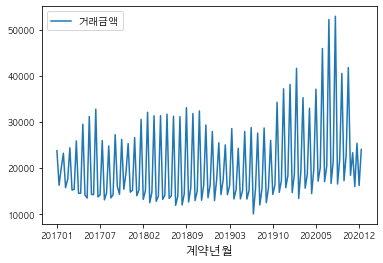

In [323]:
apt_mean = apt_mean.reset_index()


In [341]:
apt_mean_trd = apt_mean[apt_mean['유형']=='매매'].drop('유형', axis=1).rename(columns={'거래금액':'매매'})
apt_mean_yr = apt_mean[apt_mean['유형']=='전세'].drop('유형', axis=1).rename(columns={'거래금액':'전세'})
apt_mean_mth = apt_mean[apt_mean['유형']=='월세'].drop('유형', axis=1).rename(columns={'거래금액':'월세'})


In [346]:
apt_mean = apt_mean_trd.merge(apt_mean_yr.merge(apt_mean_mth))

In [347]:
apt_mean.head(3)

,계약년월,매매,전세,월세
0,201701,23792.207469,20030.045961,16283.255109
1,201702,23237.217125,17604.666081,15754.889201
2,201703,24402.887538,15433.597046,15231.079613


/Users/seungjun/.pyenv/versions/3.8.7/envs/nlev/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='계약년월'>

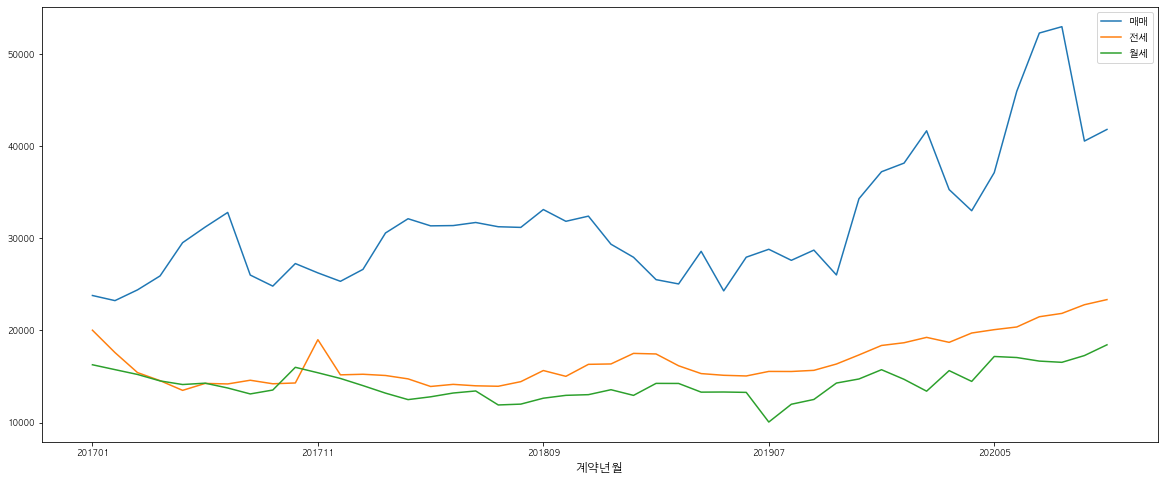

In [355]:
apt_mean.plot(x='계약년월',figsize=(20,8))